<a href="https://colab.research.google.com/github/eeuunnjjiii/Project/blob/main/n211a_simple_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isna().sum() #결측치 확인

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

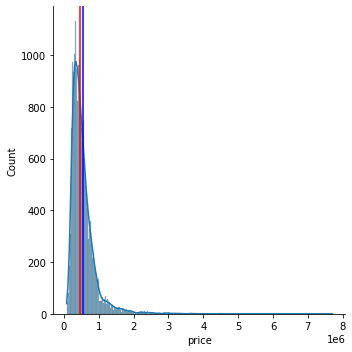

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#price의 확률밀도함수
sns.displot(df['price'],kde=True)

#평균과 중간값 표시
plt.axvline(df['price'].mean(),color='blue')
plt.axvline(df['price'].median(),color='red');

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [4]:
df.corr() #상관계수 계산

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


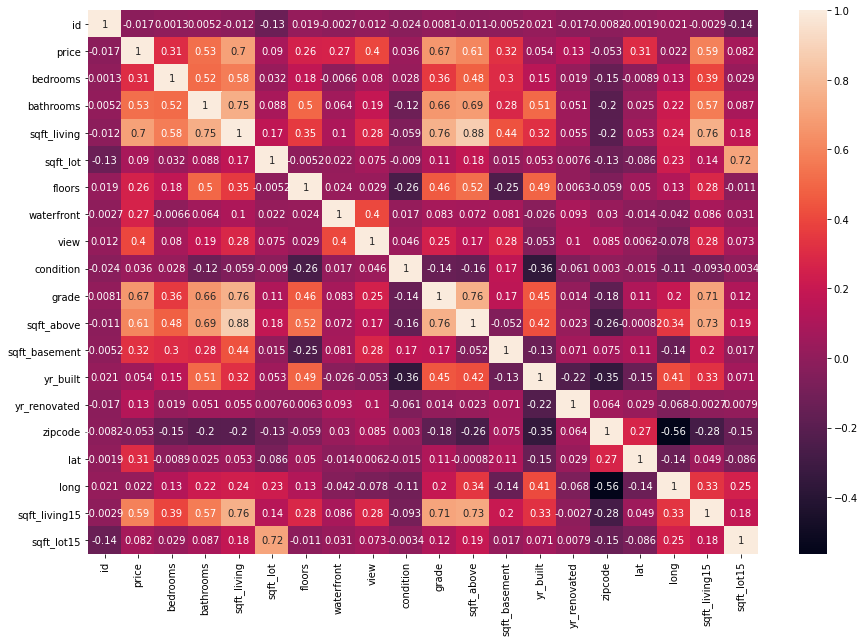

In [5]:
#상관계수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
#타겟(Price)와 상관관계가 가장 높은 특성은 sqft_living / 상관계수 0.7

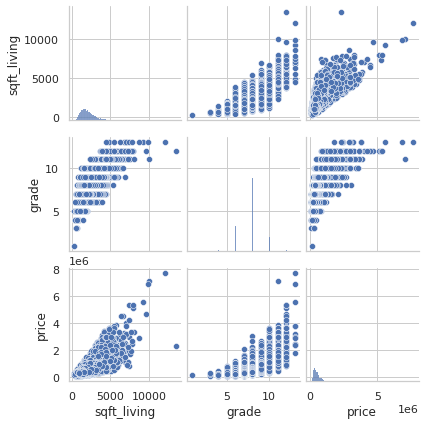

In [7]:
#sqft_living, grade, price 관계 시각화
sns.set(style='whitegrid',context='notebook')
cols=['sqft_living','grade','price']
sns.pairplot(df[cols],height=2);

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

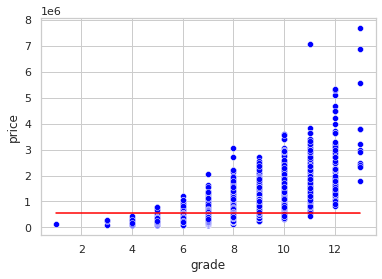

In [8]:
x=df['grade']
y=df['price']

predict=df['price'].mean()
errors=predict-df['price']
mean_absolute_error=errors.abs().mean()

sns.lineplot(x=x,y=predict,color='red')
sns.scatterplot(x=x,y=y,color='blue');

In [9]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [10]:
from sklearn.linear_model import LinearRegression
#특성 grade에 대한 선형회귀모델
model=LinearRegression()
feature=['grade']
target=['price']
X_train=df[feature]
y_train=df[target]

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#grade 값이 6일 때 모델이 예측하는 주택가격
X_test=[[6]]
y_pred=model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700 입니다.


- 시각화

In [12]:
#테스트 데이터 생성
df_t=df[['grade','sqft_living']]

In [13]:
X_test=[[x] for x in df_t['grade']]
y_pred=model.predict(X_test)
y_pred

array([[403157.96019888],
       [403157.96019888],
       [194700.3977405 ],
       ...,
       [403157.96019888],
       [611615.52265726],
       [403157.96019888]])

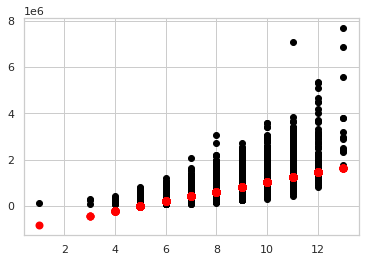

In [14]:
plt.scatter(X_train,y_train,color='black')
plt.scatter(X_test,y_pred,color='red',linewidth=2)
plt.show()

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [15]:
#계수(coefficient)
model.coef_

array([[208457.56245838]])

In [16]:
#절편(intercept)
model.intercept_

array([-1056044.97700977])

In [17]:
def explain_prediction(grade):
  y_pred=model.predict([[grade]])
  pred=f"{int(grade)} grade 주택 가격 예측 : ${int(y_pred[0])} (1 grade 당 추가금 : ${int(model.coef_[0])})"
  return pred

In [18]:
print(explain_prediction(6))

6 grade 주택 가격 예측 : $194700 (1 grade 당 추가금 : $208457)


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

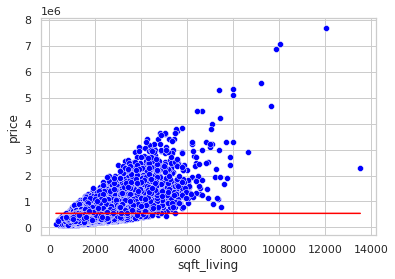

In [19]:
#sqft_living과 price의 기준모델
x2=df['sqft_living']
y2=df['price']

predict2=df['price'].mean()
errors2=predict2-df['price']
mean_absolute_error2=errors2.abs().mean()

sns.lineplot(x=x2,y=predict2,color='red')
sns.scatterplot(x=x2,y=y2,color='blue');

In [20]:
print(f'예측한 주택 가격이 ${predict2:,.0f}이며 절대평균에러가 ${mean_absolute_error2:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


In [21]:
#특성 sqft_living에 의한 선형회귀모델
model2=LinearRegression()
feature2=['sqft_living']
target2=['price']
X_train2=df[feature2]
y_train2=df[target2]

model2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#sqft_living가 1000일 때 모델이 예상하는 주택 가격
X_test2=[[1000]]
y_pred2=model2.predict(X_test2)

print(f'{X_test2[0][0]} sqft_living을 가지는 주택의 예상 가격은 ${int(y_pred2)} 입니다.')

1000 sqft_living을 가지는 주택의 예상 가격은 $237042 입니다.


In [23]:
#계수
model2.coef_

array([[280.6235679]])

In [24]:
#절편
model2.intercept_

array([-43580.74309447])

In [25]:
def sqft_prediction(sqft):
    y_pred2 = model2.predict([[sqft]])
    pred2 = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred2[0])} (1 sqft당 추가금: ${int(model2.coef_[0])})"

    return pred2

print(sqft_prediction(4000))

4000 sqft 주택 가격 예측: $1078913 (1 sqft당 추가금: $280)


- 시각화

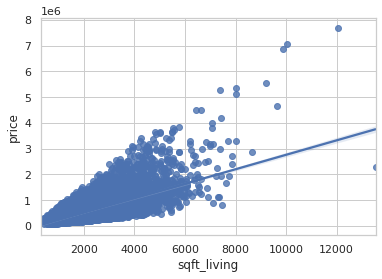

In [26]:
#seaborn regplot으로 그리면,
sns.regplot(x=df['sqft_living'],y=df['price']);

In [27]:
X_test2=[[x] for x in df_t['sqft_living']]
y_pred2=model2.predict(X_test2)
y_pred2

array([[287555.06702451],
       [677621.82640197],
       [172499.40418656],
       ...,
       [242655.29616092],
       [405416.96554144],
       [242655.29616092]])

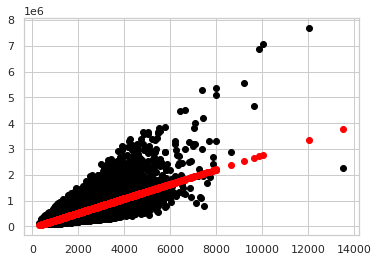

In [28]:
plt.scatter(X_train2,y_train2,color='black')
plt.scatter(X_test2,y_pred2,color='red');

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.
####- 분석 데이터가 기본 가정을 만족해야 한다.
- 선형성 : 독립변수 x와 종속변수 y간 선형성을 만족하는 특성
- 등분산성 : 분산이 같은지 여부 > 특정한 패턴 없이 고르게 분포한다.
- 정규성 : 정규분포를 띄는지 여부

*단순회귀분석에는 해당되지 않으나 다중회귀분석에서 중요한 기본가정.*
- 독립성 : 독립변수 x간 상관관계가 없이 독립성을 만족하는 특성 > 다중공선성을 일으키는 변수 제거

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.
OLS는 Ordinary Least Squares의 약자로 '최소제곱법'으로 해석되고, scikit-learn 패키지의 LinearRegression이 바로 최소 제곱 추정 방식의 회귀 예측 알고리즘이다. 실제 데이터의 y값과 추세선의 y값(예측값)의 차를 잔차(Residual)라고 하는데, 이 잔차 제곱의 합을 최소로 하는 방법이 최소제곱법이며, 이 방법을 활용하여 데이터를 가장 잘 표현하는 선형 회귀선을 그릴 수 있다. 이상치(outlier)에 큰 영향을 받아 취약하다는 한계가 있다.
